# Cantidad de viajes por bloque

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 18})

In [ ]:
csvs = ['../' + csv for csv in os.listdir('../') if csv not in ['viajes_2013.csv', 'viajes_2014.csv'] 
        and csv.endswith('.csv')]

for cnt, csv in enumerate(csvs):
    df = pd.read_csv(csv)
    
    if cnt == 0:
        bloque_count = df.groupby('Bloque')['Bloque'].count()
    else:
        count_temp = df.groupby('Bloque')['Bloque'].count()
        bloque_count = bloque_count.add(count_temp, fill_value=0)
        
bloque_count = bloque_count.sort_values(ascending=False)
bloque_count

Bloque
PJ Frente para la Victoria                  136.0
Unión Cívica Radical                         33.0
PJ La Pampa                                  16.0
Movimiento Popular Neuquino                  12.0
Justicialista San Luis                       12.0
Frente Pro                                   11.0
Partido Socialista                           10.0
Frente Cívico por Santiago                   10.0
Frente Cívico de la Provincia de Córdoba      9.0
Frente Cívico y Social de Catamarca           5.0
Nuevo Encuentro                               5.0
Movimiento Popular Fueguino                   5.0
Justicialista 8 de Octubre                    5.0
Chubut Somos Todos                            4.0
Frente de Todos                               4.0
Proyecto Sur Unen                             3.0
Federalismo Santafesino                       3.0
Gen                                           3.0
Coalición Cívica                              2.0
Frente Popular Salteño                     

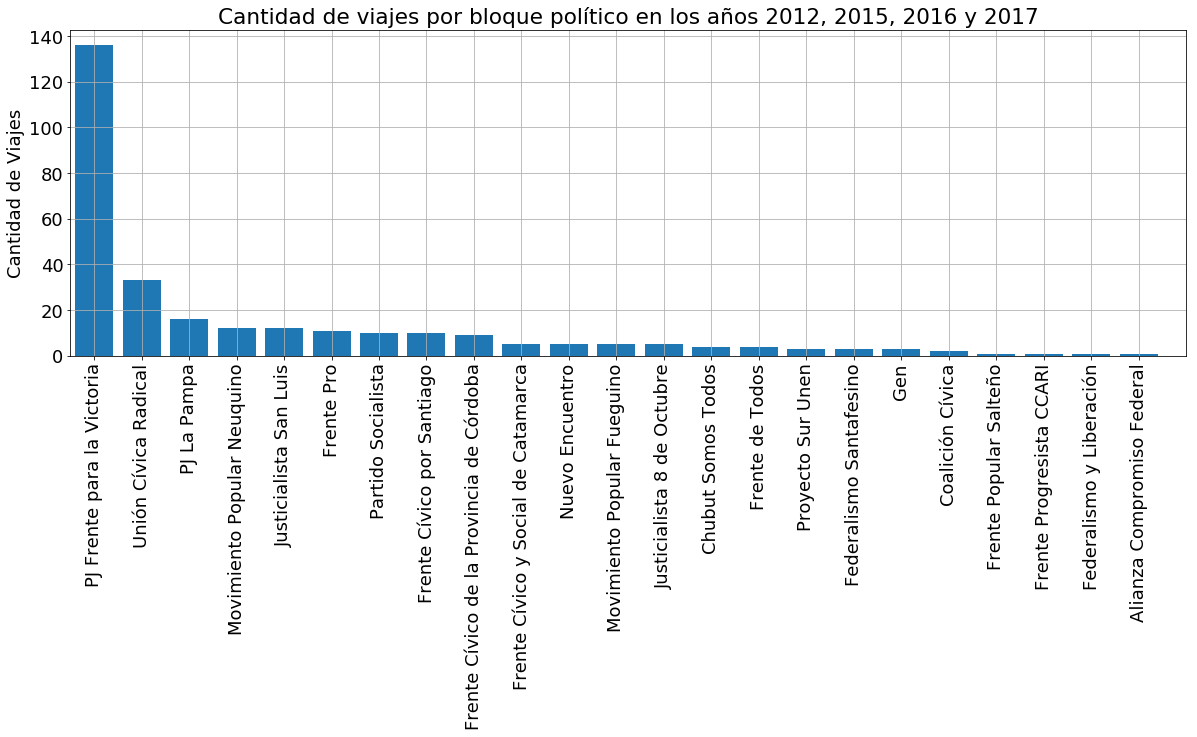

In [ ]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

numero_viajes = bloque_count.values.tolist()[:]
nombre_bloque = bloque_count.index.tolist()[:]

# the x locations for the groups
ind = np.arange(len(numero_viajes))
# the width of the bars
width = 0.8

# Bar plot
rects1 = ax.bar(ind, numero_viajes, width)

# Set x label
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(nombre_bloque)
plt.setp(xtickNames, rotation=90)
# Set y label
ax.set_ylabel('Cantidad de Viajes')
# Plot style
ax.set_title("Cantidad de viajes por bloque político en los años 2012, 2015, 2016 y 2017")
ax.set_xlim([-0.5, len(numero_viajes)])
plt.grid(True)
#plt.savefig('viajes_por_bloque.png')
plt.show()

In [ ]:
for cnt, csv in enumerate(csvs):
    df = pd.read_csv(csv)

    if cnt == 0:
        viaticos_dolar = df.groupby('Bloque')['Viaticos_dolar'].sum()
        viaticos_pesos = df.groupby('Bloque')['Viaticos_pesos'].sum()
        viaticos_euro = df.groupby('Bloque')['Viaticos_euro'].sum()
    else:
        dolar_temp = df.groupby('Bloque')['Viaticos_dolar'].sum()
        pesos_temp = df.groupby('Bloque')['Viaticos_pesos'].sum()
        euro_temp = df.groupby('Bloque')['Viaticos_euro'].sum()

        viaticos_dolar = viaticos_dolar.add(dolar_temp, fill_value=0)
        viaticos_pesos = viaticos_pesos.add(pesos_temp, fill_value=0)
        viaticos_euro = viaticos_euro.add(euro_temp, fill_value=0)

df_montos = pd.concat([viaticos_pesos, viaticos_dolar, viaticos_euro], axis=1)
df_montos = df_montos.sort_values('Viaticos_dolar', ascending=False)
df_montos

,Viaticos_pesos,Viaticos_dolar,Viaticos_euro
Bloque,,,
PJ Frente para la Victoria,89555.0,103950.0,46200.0
Unión Cívica Radical,17298.0,30350.0,6300.0
PJ La Pampa,13975.0,13700.0,7800.0
Partido Socialista,13664.0,12350.0,3600.0
Frente Cívico por Santiago,13125.0,9750.0,0.0
Frente Cívico de la Provincia de Córdoba,11550.0,7800.0,1200.0
Justicialista 8 de Octubre,0.0,7350.0,2100.0
Frente Pro,0.0,6400.0,8400.0
Movimiento Popular Neuquino,0.0,6000.0,15900.0


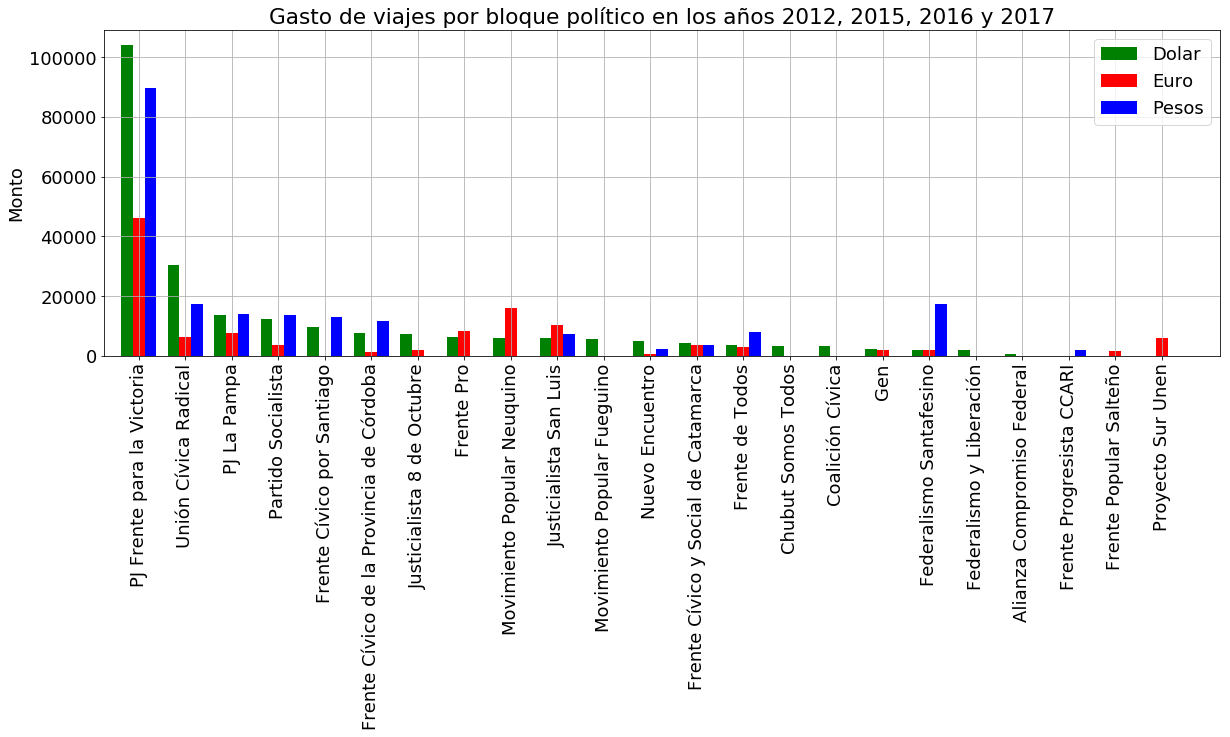

In [ ]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)

gasto_dolar = df_montos['Viaticos_dolar'].tolist()[:]
gasto_euro = df_montos['Viaticos_euro'].tolist()[:]
gasto_pesos = df_montos['Viaticos_pesos'].tolist()[:]

nombre_bloque = df_montos.index.tolist()[:]

# the x locations for the groups
ind = np.arange(len(gasto_dolar))
# the width of the bars
width = 0.25

# Bar plot
rects1 = ax.bar(ind, gasto_dolar, width, color='g')
rects2 = ax.bar(ind + width, gasto_euro, width, color='red')
rects3 = ax.bar(ind + 2*width, gasto_pesos, width, color='b')

# Set x label
ax.set_xticks(ind + width)
xtickNames = ax.set_xticklabels(nombre_bloque)
plt.setp(xtickNames, rotation=90)
# Set y label
ax.set_ylabel('Monto')
# Plot style
ax.set_title("Gasto de viajes por bloque político en los años 2012, 2015, 2016 y 2017")
ax.set_xlim([-0.5, len(gasto_dolar)+0.5])
ax.legend((rects1[0], rects2[0], rects3[0]), ('Dolar', 'Euro', 'Pesos') )

plt.grid(True)
#plt.savefig('gastos_por_bloque.png')
plt.show()

In [ ]:
for cnt, csv in enumerate(csvs):
    df = pd.read_csv(csv)
    
    if cnt == 0:
        autoridad_count = df.groupby('Autoridad')['Autoridad'].count()
    else:
        count_temp = df.groupby('Autoridad')['Autoridad'].count()
        autoridad_count = autoridad_count.add(count_temp, fill_value=0)

autoridad_count = autoridad_count.sort_values(ascending=False)
autoridad_count

Autoridad
FELLNER, Liliana                              14.0
HIGONET, María de los Ángeles                 13.0
CREXELL, Carmen Lucila                        10.0
URTUBEY, Rodolfo Julio                         8.0
PINEDO, Federico                               8.0
FELLNER, Liliana Beatriz                       7.0
MORANDINI, Norma                               7.0
ROZAS, Ángel                                   6.0
BIANCALANI, Fabio Dario                        6.0
GIUSTINIANI, Rubén Héctor                      6.0
BOYADJIAN, Miriam Ruth                         5.0
NEGRE DE ALONSO, Liliana                       5.0
GIACOPPO, Silvia del Rosario                   5.0
GODOY, Ruperto                                 5.0
ESCUDERO, Sonia Margarita                      5.0
CIMADEVILLA, Mario                             4.0
DE LA ROSA, María                              4.0
GIUSTINIANI, Rubén                             4.0
BERMEJO, Rolando                               4.0
ABAL MEDINA, Juan Man

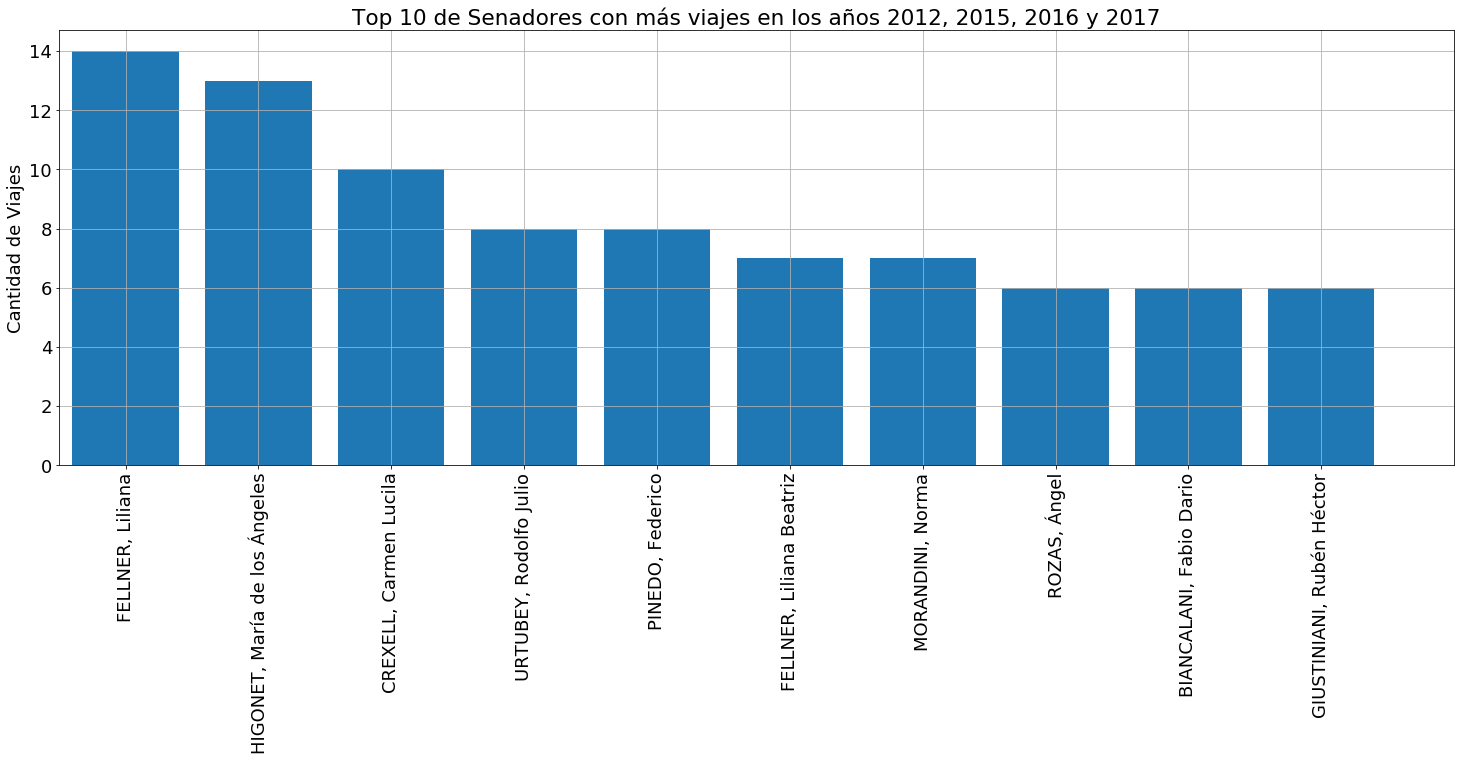

In [ ]:
fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(111)

numero_viajes = autoridad_count.values.tolist()[:10]
nombre_bloque = autoridad_count.index.tolist()[:10]

# the x locations for the groups
ind = np.arange(len(numero_viajes))
# the width of the bars
width = 0.8

# Bar plot
rects1 = ax.bar(ind, numero_viajes, width)

# Set x label
ax.set_xticks(ind)
xtickNames = ax.set_xticklabels(nombre_bloque)
plt.setp(xtickNames, rotation=90)
# Set y label
ax.set_ylabel('Cantidad de Viajes')
# Plot style
ax.set_title("Top 10 de Senadores con más viajes en los años 2012, 2015, 2016 y 2017")
ax.set_xlim([-0.5, len(numero_viajes)])
plt.grid(True)
#plt.savefig('top_10.png')
plt.show()